<a href="https://colab.research.google.com/github/jacobdwatters/NIOSH-Project/blob/main/ViolationDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Setup

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn import set_config
from sklearn.linear_model import LogisticRegression
from joblib import dump, load

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Exploration and Analysis

In [9]:
# Load the data and drop the first column which is just the row number.
violations = pd.read_csv('gdrive/My Drive/NIOSH Project/data/violations_processed.csv').iloc[: , 1:]

# # Selecting Parameters
# X = violations[['year_occur', 
#           'VIOLATION_ISSUE_TIME',
#           'VIOLATOR_VIOLATION_CNT',
#           'MINE_TYPE', 
#           'COAL_METAL_IND', 
#           'NEGLIGENCE',
#           'LIKELIHOOD', 
#           'NO_AFFECTED',
#           'INJ_ILLNESS',
#           'SIG_SUB']]

# y = violations['PROPOSED_PENALTY']

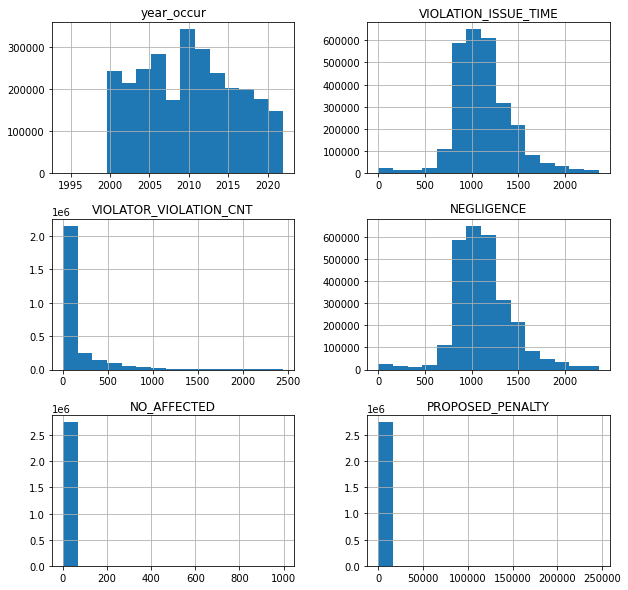

In [10]:
hist = violations.hist(figsize=(10,10), bins=15)

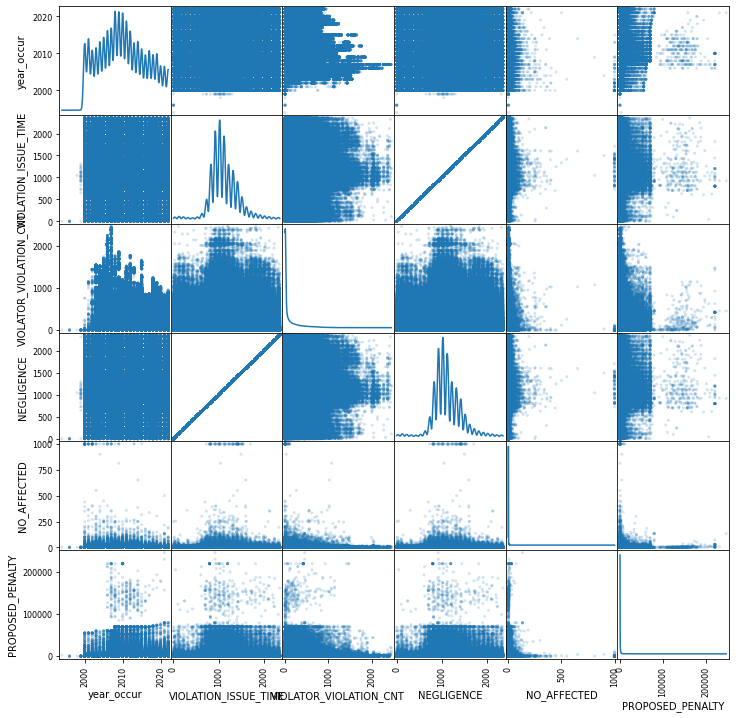

In [11]:
scat_mat = pd.plotting.scatter_matrix(violations, alpha=0.2, figsize=(12, 12), diagonal="kde")

Text(0.5, 1.0, 'Corelation Matrix')

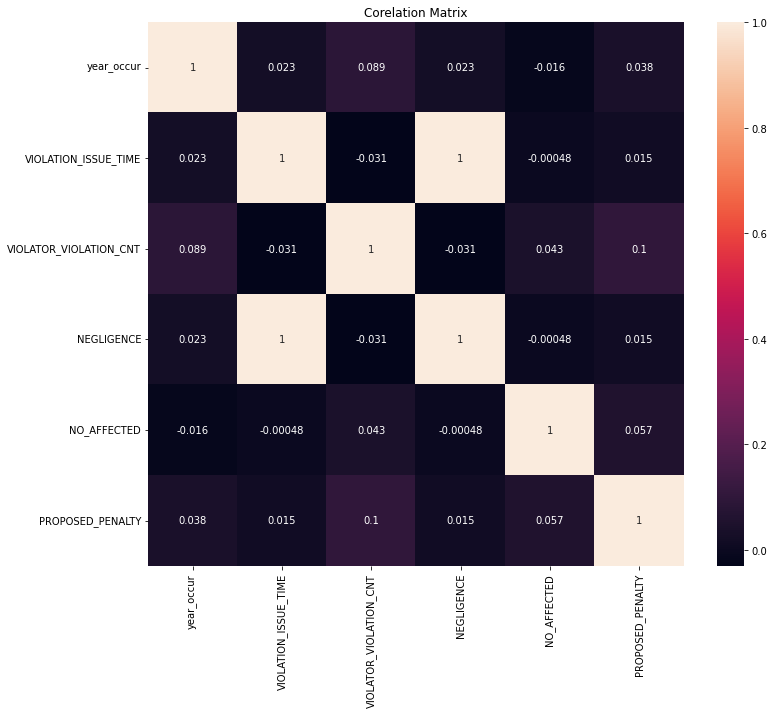

In [12]:
plt.figure(figsize=(12, 10))
corr_map = sns.heatmap(violations.corr(), annot=True)
corr_map.set_title('Corelation Matrix')

In [16]:
violations['VIOLATION_ISSUE_TIME']

0           935.0
1          1412.0
2           830.0
3           715.0
4           900.0
            ...  
2754002    1621.0
2754003    1200.0
2754004    1002.0
2754005     955.0
2754006       NaN
Name: VIOLATION_ISSUE_TIME, Length: 2754007, dtype: float64

In [17]:
# NEGLIGENCE column does not contain the correct values.
violations['NEGLIGENCE']

0           935.0
1          1412.0
2           830.0
3           715.0
4           900.0
            ...  
2754002    1621.0
2754003    1200.0
2754004    1002.0
2754005     955.0
2754006    2319.0
Name: NEGLIGENCE, Length: 2754007, dtype: float64